## Business Questions 
The following questions are to help undersatnding the hosting business in  
Seattle area for those who are interested to invest in AirBNB properties.
1. Which neigbourhood is best investment for an airbnb business 
2. what is the best property type (house, apartment ...etc) to invest in. 
3. what is the  size the proerty in terms of number guests to accomodate.
4. predict the annual revenue based on number of guests, number of reviews and review scores rating.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display

df = pd.read_csv('C:/Users/u205860/Desktop/Training/DataScience/Course_2/Project/listings.csv')


Data preperations: 

In [2]:
# Selecting features from "listings.csv" file to help answers the business questions
vars_char = df[['beds', 'neighbourhood_cleansed', 'property_type', 'price', 'guests_included', 'availability_365', 'number_of_reviews', 'review_scores_rating']]

# conversting the column "price" from object to float
vars_char['price'] = vars_char['price'].str.replace('$', '')
vars_char['price'] = vars_char['price'].str.replace(',' , '').astype(float)
vars_char['guests_included'] = vars_char['guests_included'].astype(float)


C:\Users\u205860\AppData\Local\Temp\ipykernel_22520\1549297775.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_char['price'] = vars_char['price'].str.replace('$', '')
C:\Users\u205860\AppData\Local\Temp\ipykernel_22520\1549297775.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_char['price'] = vars_char['price'].str.replace(',' , '').astype(float)
C:\Users\u205860\AppData\Local\Temp\ipykernel_22520\1549297775.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

The following code is to answer the first and second questions.  
the code will generate two bar charts: the first is full year revenue by neighbourhood  
and the second is the full year revenue by property type.

0
0


C:\Users\u205860\AppData\Local\Temp\ipykernel_22520\1035541926.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_char['booked_365'] = 365 - vars_char['availability_365']
C:\Users\u205860\AppData\Local\Temp\ipykernel_22520\1035541926.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_char['revenue_FY'] = vars_char['booked_365'] * vars_char['price']


Text(0, 0.5, 'Annual Revenue [in millions]')

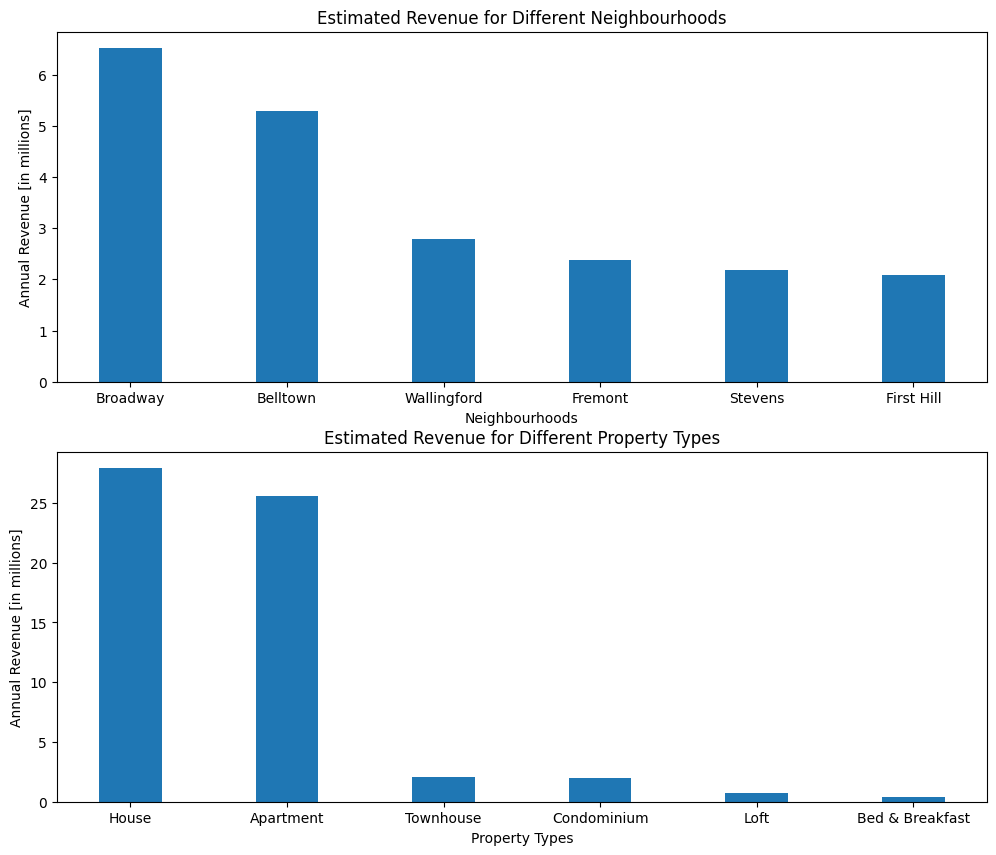

In [3]:
# 1- Which neigbourhood is best investment for an airbnb business. 
# 2- what is the best property type (house, apartment ...etc) to invest in. 


# finding the number of NaN in the 'price' column
nan_count = vars_char['price'].isna().sum()
print(nan_count)  # the 'price' column have zero NaN values

# finding the number of NaN in the 'availability_365' column
nan_count = vars_char['availability_365'].isna().sum()
print(nan_count)  # the 'availability_365' column have zero NaN values

# estimated annual revenue 
vars_char['booked_365'] = 365 - vars_char['availability_365']
vars_char['revenue_FY'] = vars_char['booked_365'] * vars_char['price']


# annual revenue by property type 
revenue_by_property_type = vars_char.groupby('property_type')['revenue_FY'].sum().reset_index()
revenue_by_property_type = revenue_by_property_type.sort_values(by='revenue_FY', ascending=False).reset_index(drop=True)

# annual revenue by Neighbourhood
revenue_by_neighbourhood = vars_char.groupby('neighbourhood_cleansed')['revenue_FY'].sum().reset_index()
revenue_by_neighbourhood = revenue_by_neighbourhood.sort_values(by='revenue_FY', ascending=False).reset_index(drop=True)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

ax1.bar(revenue_by_neighbourhood['neighbourhood_cleansed'].head(6), revenue_by_neighbourhood['revenue_FY'].head(6)/1000000, width=0.4, align='center')
ax1.set_xticks(range(len(revenue_by_neighbourhood['neighbourhood_cleansed'].head(6))))
ax1.set_title('Estimated Revenue for Different Neighbourhoods')
ax1.set_xlabel('Neighbourhoods')
ax1.set_ylabel('Annual Revenue [in millions]')

ax2.bar(revenue_by_property_type['property_type'].head(6), revenue_by_property_type['revenue_FY'].head(6)/1000000, width=0.4, align='center')
ax2.set_xticks(range(len(revenue_by_property_type['property_type'].head(6))))
ax2.set_title('Estimated Revenue for Different Property Types')
ax2.set_xlabel('Property Types')
ax2.set_ylabel('Annual Revenue [in millions]')

After narrowing down the neighbourhood and the property type with most full year revenue in the above code section,  
the following code is focusing on the property size by number of beds and number of guests included.

0


C:\Users\u205860\AppData\Local\Temp\ipykernel_22520\3546336148.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_char['revenue_FY'] = vars_char['revenue_FY']/1000000


Text(0, 0.5, 'Annual Revenue [in millions]')

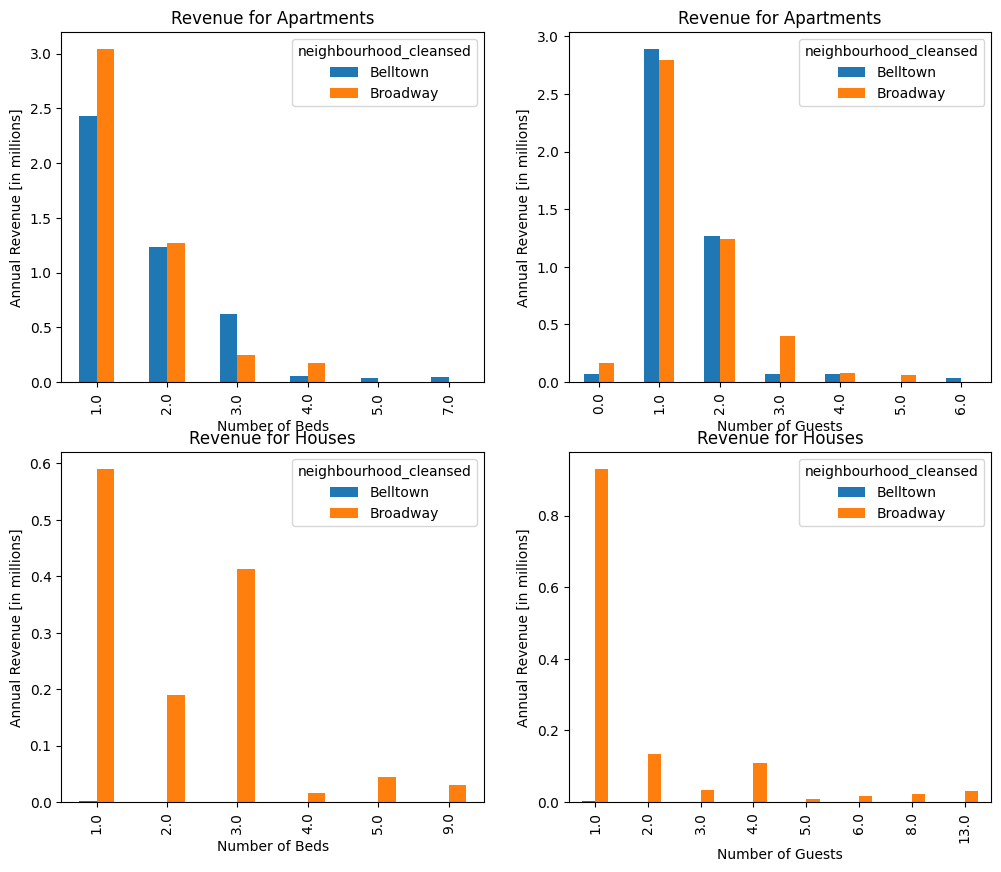

In [4]:
# 3- what is the  size the proerty in terms of number guests to accomodate.

# finding the number of NaN in the 'guests_included' column
nan_count = vars_char['guests_included'].isna().sum()
print(nan_count)  # the 'guests_included' column have zero NaN values

# changing the revenue to column to be in millions
vars_char['revenue_FY'] = vars_char['revenue_FY']/1000000


vars_for_house = vars_char[vars_char['property_type'] == 'House']
vars_for_house = vars_for_house[vars_for_house['neighbourhood_cleansed'].isin(['Belltown', 'Broadway'])]

vars_for_apartment = vars_char[vars_char['property_type'] == 'Apartment']
vars_for_apartment = vars_for_apartment[vars_for_apartment['neighbourhood_cleansed'].isin(['Belltown', 'Broadway'])]

revenue_for_house_by_guests = vars_for_house[['revenue_FY', 'guests_included', 'neighbourhood_cleansed']]
revenue_for_apartment_by_guests = vars_for_apartment[['revenue_FY', 'guests_included', 'neighbourhood_cleansed']]

revenue_for_house_by_beds = vars_for_house[['revenue_FY', 'beds', 'neighbourhood_cleansed']]
revenue_for_apartment_by_beds = vars_for_apartment[['revenue_FY', 'beds', 'neighbourhood_cleansed']]

revenue_for_house_by_guests = revenue_for_house_by_guests.groupby(['guests_included', 'neighbourhood_cleansed'])['revenue_FY'].sum().reset_index()
revenue_for_apartment_by_guests = revenue_for_apartment_by_guests.groupby(['guests_included', 'neighbourhood_cleansed'])['revenue_FY'].sum().reset_index()

revenue_for_house_by_beds = revenue_for_house_by_beds.groupby(['beds', 'neighbourhood_cleansed'])['revenue_FY'].sum().reset_index()
revenue_for_apartment_by_beds = revenue_for_apartment_by_beds.groupby(['beds', 'neighbourhood_cleansed'])['revenue_FY'].sum().reset_index()



revenue_for_apartment_by_beds = revenue_for_apartment_by_beds.pivot(index='beds', columns='neighbourhood_cleansed', values='revenue_FY')
revenue_for_apartment_by_guests = revenue_for_apartment_by_guests.pivot(index='guests_included', columns='neighbourhood_cleansed', values='revenue_FY')
revenue_for_house_by_beds = revenue_for_house_by_beds.pivot(index='beds', columns='neighbourhood_cleansed', values='revenue_FY')
revenue_for_house_by_guests = revenue_for_house_by_guests.pivot(index='guests_included', columns='neighbourhood_cleansed', values='revenue_FY')


fig, axs = plt.subplots(2, 2, figsize=(12, 10))

revenue_for_apartment_by_beds.plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('Revenue for Apartments')
axs[0, 0].set_xlabel('Number of Beds')
axs[0, 0].set_ylabel('Annual Revenue [in millions]')


revenue_for_apartment_by_guests.plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('Revenue for Apartments')
axs[0, 1].set_xlabel('Number of Guests')
axs[0, 1].set_ylabel('Annual Revenue [in millions]')

revenue_for_house_by_beds.plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Revenue for Houses')
axs[1, 0].set_xlabel('Number of Beds')
axs[1, 0].set_ylabel('Annual Revenue [in millions]')

revenue_for_house_by_guests.plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Revenue for Houses')
axs[1, 1].set_xlabel('Number of Guests')
axs[1, 1].set_ylabel('Annual Revenue [in millions]')





The following code section is to predict a full year revenue using "number_or_reviews", "review_scores_rating"  
and "guests_inluced" as input features. 

In [5]:
#4- predict the annual revenue based on number of guests, number of reviews and review scores rating.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import tree

nan_count = vars_char['review_scores_rating'].isna().sum()
print(nan_count)  # the 'review_scores_rating' column has 647 NaN values which needed to be removed
nan_count = vars_char['number_of_reviews'].isna().sum()
print(nan_count)  # the 'number_of_reviews' column have zero NaN values

# removing all rows where "review_scores_rating" column has a NaN value
vars_char_cleaned = vars_char.dropna(subset=['review_scores_rating'], axis=0)

X = vars_char_cleaned[['number_of_reviews', 'review_scores_rating', 'guests_included']] 
y = vars_char_cleaned['revenue_FY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

X_train.values.tolist()
y_train.values.tolist()
X_test.values.tolist()
y_test.values.tolist()

#Instantiate
lm_model = LinearRegression(positive=True) 
lm_model.fit(X_train, y_train)

y_test_preds = lm_model.predict(X_test)# Predictions here
r2_test = r2_score(y_test, y_test_preds) # Rsquared here

print(r2_test)




647
0
0.09133937937145054


The prediction model for the code above showed a low r2 score. The following  
code section is to examine the correlations between the freatures of interest. 

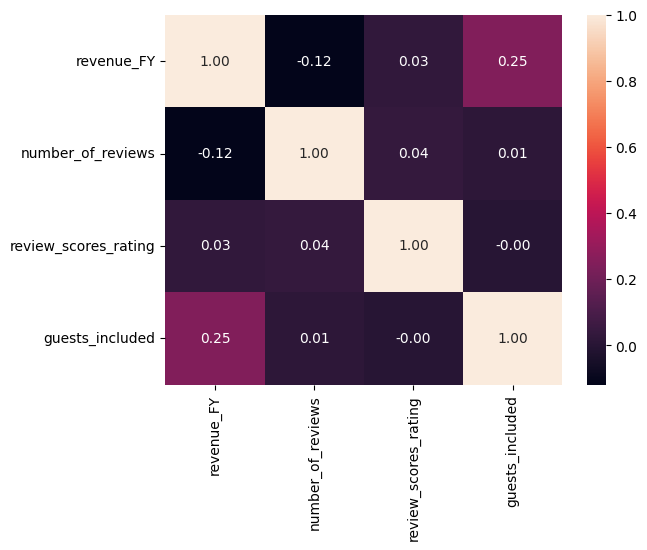

In [6]:
import seaborn as sns
vars_char_corr = vars_char_cleaned[['revenue_FY', 'number_of_reviews', 'review_scores_rating', 'guests_included']]
sns.heatmap(vars_char_corr.corr(), annot=True, fmt=".2f");